In [19]:
import json
import pandas as pd
import base64
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

## Off Facebook Analysis ##
**I expect this data will include many clothing websites because I like to both online shop and look at outfit ideas on Pinterest. I also think websites relating to academics may be present since I am currently a student as well.**

I started by loading in my json file and creating a data frame from the information. 

In [3]:
with open ("your_off-facebook_activity copy.json") as j:
    off_fb = json.load(j)

In [ ]:
off_fb

In [5]:
fb_df = pd.DataFrame(off_fb)

In [6]:
fb_df.head()

,off_facebook_activity_v2
0,"{'name': 'etsy.com', 'events': [{'id': 2974720..."
1,"{'name': 'emmiol.com', 'events': [{'id': 47971..."
2,"{'name': 'depop.com', 'events': [{'id': 366039..."
3,"{'name': 'quora.com', 'events': [{'id': 167558..."
4,"{'name': 'dollskill.com', 'events': [{'id': 60..."


I created a second data frame by splitting the activity column into two columns: name and events.

In [7]:
v2_df = pd.DataFrame(list(fb_df['off_facebook_activity_v2']))

In [8]:
v2_df.head()

,name,events
0,etsy.com,"[{'id': 297472060462208, 'type': 'PAGE_VIEW', ..."
1,emmiol.com,"[{'id': 479717462733375, 'type': 'ADD_TO_CART'..."
2,depop.com,"[{'id': 366039483606207, 'type': 'PAGE_VIEW', ..."
3,quora.com,"[{'id': 1675581722730896, 'type': 'PAGE_VIEW',..."
4,dollskill.com,"[{'id': 607675075993844, 'type': 'PAGE_VIEW', ..."


In [9]:
v2_df['events'][0]

[{'id': 297472060462208, 'type': 'PAGE_VIEW', 'timestamp': 1662351000},
 {'id': 395490361516997, 'type': 'PAGE_VIEW', 'timestamp': 1662351000},
 {'id': 114623403312281, 'type': 'PAGE_VIEW', 'timestamp': 1662336660},
 {'id': 297472060462208, 'type': 'PAGE_VIEW', 'timestamp': 1662336660},
 {'id': 395490361516997, 'type': 'PAGE_VIEW', 'timestamp': 1662336660}]

In [120]:
len(v2_df['events'][0])

5

I used list comprehension and the groupby function to create a data frame that has a column for the names of the websites and a column for how frequently Facebook tracked each. 

In [128]:
final_df = v2_df.groupby(['name']).count()
final_df['events'] = [len(x) for x in v2_df['events']]

In [136]:
final_df.head()

,events
name,
Amazon,5
Spark SMG,3
anaconda.com,6
billhighway.co,1
blackmilkclothing.com,5


**This histogram shows that Facebook tracked most websites between 1 and 5 times. However, I have one main outlier: genius.com. This was slightly surprising to me because I did not realize that genius of all websites would use Facebook data the most.**

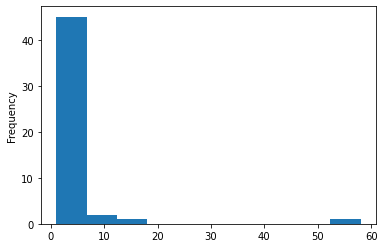

In [132]:
events_hist = final_df['events'].plot.hist()
plt.show()

In [146]:
final_final_df = final_df.sort_values('events', ascending=False)
final_final_df[0:20]

,events
name,
genius.com,58
pewresearch.org,15
microsoft.com,10
vimeo.com,9
anaconda.com,6
hellobombshell.com,5
Amazon,5
blackmilkclothing.com,5
quora.com,3


**This bar graph shows the websites Facebook tracked most often. Like the histogram above, it shows that genius.com was tracked the most, followed by The Pew Research Center and Microsoft. Several of the websites listed I have never been to, but they seem similar to ones I have visited. For example, I have never been to shopkira.com, but it seems similar to forever21.com which I have visited. From this data, I think Facebook would conclude I like music (from genius.com and songkick.com) and online shopping (from the numerous clothing websites), and that I am in the media field (from the Pew Research Center and wordpress.com). All of this would be accurate.**

Text(0, 0.5, 'number of events')

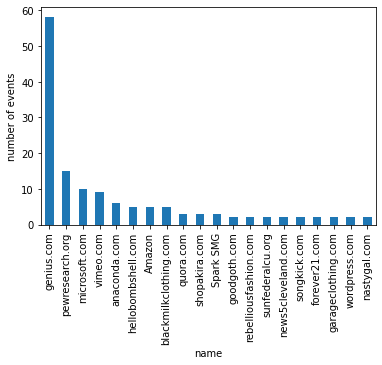

In [154]:
fig1, ax1 = plt.subplots()
events_bar = final_final_df['events'][0:20].plot.bar()
ax1.set_ylabel('number of events')

## My Spotify Analysis: 'Stoney' v 'So Far Gone' ##

**For this project I picked Post Malone's 'Stoney' and Drake's 'So Far Gone' because they are two of my favorite rap albums. I want to compare them to see if I like certain recurring aspects in the rap music I listen to since I am very picky within the genre. I think I am typically more drawn to rap music that could also be considered r&b, so I will be looking at both tempo and energy to see if this is true (as r&b is usually slower and more relaxed than what people think of when they think of rap.)**

**My hypothesis is that 'Stoney' and 'So Far Gone' will on average have songs with slower tempos and less energy due to the fact I enjoy more relaxed rap music.**

I started by loading in the Spotify Keys in order to access the data I needed. 

In [40]:
keys = pd.read_csv("Spotify-Keys_9-23-21", header = 0, sep = ",")

In [41]:
appid = keys['Client_ID'][0]

In [42]:
appsecret = keys['Client_Secret'][0]

In [43]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [44]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [45]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [46]:
response = requests.post(access_token_url, headers = header, data = payload)

In [47]:
session_token = response.json()['access_token']

In [48]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

I got the code needed to access the information on 'Stoney' from the album's url.

In [49]:
stoney_id = '5s0rmjP8XOPhP6HhqOhuyC'

In [50]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(stoney_id)

In [51]:
stoney_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [52]:
stoney_tracks.status_code

200

In [53]:
stoney_dict = json.loads(stoney_tracks.text)

In [54]:
stoney_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [55]:
stoney_track_ids = [x['id'] for x in stoney_dict['items']]

In [56]:
stoney_track_strings = ','.join(str(x) for x in stoney_track_ids)

In [57]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(stoney_track_strings)

In [58]:
stoney_features = requests.get(track_features_endpoint, headers = session_header)

In [59]:
stoney_features.status_code

200

In [60]:
stoney_dict = json.loads(stoney_features.text)

I created a data frame for the features of 'Stoney' and exported it as a csv file in order to create the histogram and scatter plot.

In [61]:
stoney_df = pd.DataFrame(stoney_dict['audio_features'])

In [62]:
stoney_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.512,0.673,0,-7.359,1,0.0523,0.2890,0.000003,0.1260,0.110,99.840,audio_features,5BoOzegGrg5XFRR8UBDtkF,spotify:track:5BoOzegGrg5XFRR8UBDtkF,https://api.spotify.com/v1/tracks/5BoOzegGrg5X...,https://api.spotify.com/v1/audio-analysis/5BoO...,233813,4
1,0.442,0.684,6,-4.888,0,0.1680,0.1910,0.000000,0.0725,0.218,170.861,audio_features,02opp1cycqiFNDpLd2o1J3,spotify:track:02opp1cycqiFNDpLd2o1J3,https://api.spotify.com/v1/tracks/02opp1cycqiF...,https://api.spotify.com/v1/audio-analysis/02op...,207680,4
2,0.620,0.690,7,-6.508,1,0.0493,0.0931,0.000000,0.1310,0.331,133.935,audio_features,0H8XeaJunhvpBdBFIYi6Sh,spotify:track:0H8XeaJunhvpBdBFIYi6Sh,https://api.spotify.com/v1/tracks/0H8XeaJunhvp...,https://api.spotify.com/v1/audio-analysis/0H8X...,234213,4
3,0.575,0.734,2,-4.949,1,0.0570,0.0757,0.000000,0.2410,0.494,83.986,audio_features,6M0IsaUX4GNyto4niSegfI,spotify:track:6M0IsaUX4GNyto4niSegfI,https://api.spotify.com/v1/tracks/6M0IsaUX4GNy...,https://api.spotify.com/v1/audio-analysis/6M0I...,179827,4
4,0.670,0.572,4,-7.312,0,0.0415,0.6470,0.000005,0.1040,0.259,132.980,audio_features,1QWmKmqhv5zcsS3v45FNl0,spotify:track:1QWmKmqhv5zcsS3v45FNl0,https://api.spotify.com/v1/tracks/1QWmKmqhv5zc...,https://api.spotify.com/v1/audio-analysis/1QWm...,268933,4


In [63]:
stoney_df.to_csv('stoney.csv')

In [64]:
appid = keys['Client_ID'][0]

In [65]:
appsecret = keys['Client_Secret'][0]

In [66]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [67]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [68]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [69]:
response = requests.post(access_token_url, headers = header, data = payload)

In [70]:
session_token = response.json()['access_token']

In [71]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

I got the code needed to access the information on 'So Far Gone' from the album's url.

In [72]:
so_far_gone_id = '1LShhEEKRT5MNPcO7jtYHh'

In [73]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(so_far_gone_id)

In [74]:
sfg_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [75]:
sfg_tracks.status_code

200

In [78]:
sfg_dict = json.loads(sfg_tracks.text)

In [79]:
sfg_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [80]:
sfg_dict['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [81]:
sfg_track_ids = [x['id'] for x in sfg_dict['items']]

In [82]:
sfg_track_strings = ','.join(str(x) for x in sfg_track_ids)

In [83]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(sfg_track_strings)

In [84]:
sfg_features = requests.get(track_features_endpoint, headers = session_header)

In [85]:
sfg_features.status_code

200

In [86]:
sfg_dict = json.loads(sfg_features.text)

In [87]:
sfg_dict.keys()

dict_keys(['audio_features'])

I created a data frame for the features of 'So Far Gone' and exported it as a csv file in order to create the histogram and scatter plot.

In [89]:
sfg_df = pd.DataFrame(sfg_dict['audio_features'])

In [90]:
sfg_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.462,0.422,6,-10.381,1,0.1750,0.93900,0.03270,0.108,0.0853,87.364,audio_features,1v24T2ug4TlssYZvI3aL4O,spotify:track:1v24T2ug4TlssYZvI3aL4O,https://api.spotify.com/v1/tracks/1v24T2ug4Tls...,https://api.spotify.com/v1/audio-analysis/1v24...,176179,4
1,0.683,0.695,1,-6.798,0,0.0574,0.39300,0.00124,0.124,0.4060,135.337,audio_features,3XLSlQLJf3Ut0zvMUxnF1h,spotify:track:3XLSlQLJf3Ut0zvMUxnF1h,https://api.spotify.com/v1/tracks/3XLSlQLJf3Ut...,https://api.spotify.com/v1/audio-analysis/3XLS...,290791,4
2,0.562,0.544,8,-5.065,1,0.3690,0.53600,0.00000,0.170,0.2310,159.517,audio_features,6NwhtCYkfwWlcR62Ac4E7y,spotify:track:6NwhtCYkfwWlcR62Ac4E7y,https://api.spotify.com/v1/tracks/6NwhtCYkfwWl...,https://api.spotify.com/v1/audio-analysis/6Nwh...,375050,4
3,0.790,0.731,9,-4.607,0,0.0327,0.00427,0.29000,0.157,0.9380,127.403,audio_features,4FDSPGncHRpr6yB8DD4CtI,spotify:track:4FDSPGncHRpr6yB8DD4CtI,https://api.spotify.com/v1/tracks/4FDSPGncHRpr...,https://api.spotify.com/v1/audio-analysis/4FDS...,234176,4
4,0.749,0.476,11,-11.147,0,0.5070,0.57900,0.00000,0.100,0.5340,71.937,audio_features,0JaVdpmiex2EP7bBzyKVTa,spotify:track:0JaVdpmiex2EP7bBzyKVTa,https://api.spotify.com/v1/tracks/0JaVdpmiex2E...,https://api.spotify.com/v1/audio-analysis/0JaV...,188189,4


In [91]:
sfg_df.to_csv('so far gone.csv')

I combined the contents of both csv files into one and added an album column in order to access all the information in one file. 

In [92]:
my_audio = pd.read_csv('my_audio.csv', sep = ',')

**This first figure shows that the tempo of songs on 'So Far Gone' are on average slower than the songs on 'Stoney.' On the other hand, the energy of the songs on 'So Far Gone' are higher on average than those on 'Stoney.' The songs on 'Stoney' stick to midpoints more than the songs on 'So Far Gone.'**

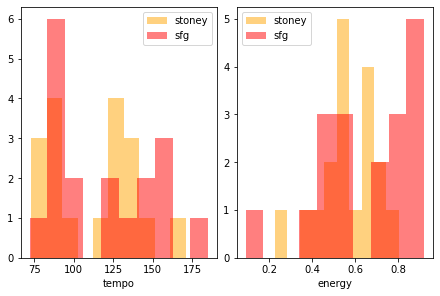

In [101]:
fig1, ax1 = plt.subplots(1, 2, layout = 'constrained')

stoney_tempo = my_audio[my_audio['Album'] == 'Stoney']['tempo']
sfg_tempo = my_audio[my_audio['Album'] == 'So Far Gone']['tempo']

stoney_energy = my_audio[my_audio['Album'] == 'Stoney']['energy']
sfg_energy = my_audio[my_audio['Album'] == 'So Far Gone']['energy']

ax1[0].hist(stoney_tempo, alpha = 0.5, color ='orange', label = 'stoney')
ax1[0].hist(sfg_tempo, alpha = 0.5, color = 'red', label = 'sfg')

ax1[1].hist(stoney_energy, alpha = 0.5, color ='orange', label = 'stoney')
ax1[1].hist(sfg_energy, alpha = 0.5, color = 'red', label = 'sfg')

ax1[0].set_xlabel('tempo')
ax1[1].set_xlabel('energy')

ax1[0].legend()
ax1[1].legend()

plt.show()

**This second figure shows the relationship between the tempo and energy of both 'Stoney' and 'So Far Gone' individually. From this figure it seems as though the songs on both albums have higher energy even when the tempo of the songs vary.**

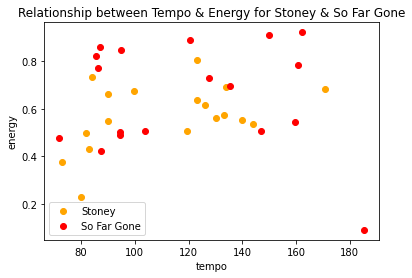

In [94]:
fig2, ax1 = plt.subplots()
stoney_df = my_audio[my_audio['Album'] == 'Stoney']
sfg_df = my_audio[my_audio['Album'] == 'So Far Gone']
ax1.scatter(stoney_df['tempo'], stoney_df['energy'], label = 'Stoney', color = 'orange')
ax1.scatter(sfg_df['tempo'], sfg_df['energy'], label = 'So Far Gone', color = 'red')
ax1.set_xlabel('tempo')
ax1.set_ylabel('energy')
ax1.set_title('Relationship between Tempo & Energy for Stoney & So Far Gone')
ax1.legend()
plt.show()

**Figure three conveys the same idea as figure two except it considers both albums together instead of individually. Similar conclusions can be drawn.**

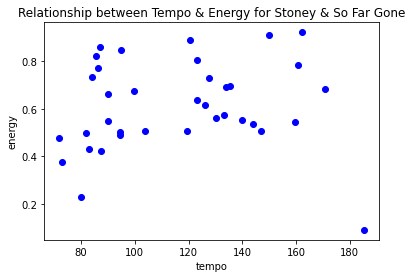

In [95]:
fig3, ax1 = plt.subplots()
general_df = my_audio
ax1.scatter(general_df['tempo'], general_df['energy'], color = 'blue')
ax1.set_xlabel('tempo')
ax1.set_ylabel('energy')
ax1.set_title('Relationship between Tempo & Energy for Stoney & So Far Gone')
plt.show()

**Figure four is a box plot of the tempos for the songs on both albums. From looking at the graph, it seems as though the tempos on 'So Far Gone' have a larger range than the tempos on 'Stoney.'**

I made sure to use the jitter function to spread out the points as the tempos of many of the songs were around the same numbers.

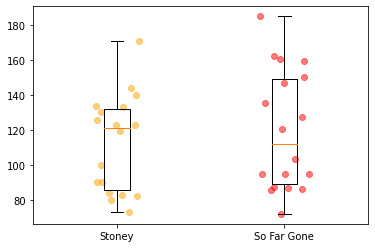

In [96]:
fig4, ax1 = plt.subplots()
stoney_tempo = my_audio[my_audio['Album'] == 'Stoney']['tempo']
sfg_tempo = my_audio[my_audio['Album'] == 'So Far Gone']['tempo']
stoney_x = [1] * len(stoney_tempo)
sfg_x = [2] * len(sfg_tempo)
stoney_x_jitter = np.random.uniform(-0.15, 0.15, len(stoney_x))
sfg_x_jitter = np.random.uniform(-0.15, 0.15, len (sfg_x))
ax1.scatter(stoney_x + stoney_x_jitter, stoney_tempo, alpha = 0.5, color = 'orange')
ax1.scatter(sfg_x + sfg_x_jitter, sfg_tempo, alpha = 0.5, color = 'red')
ax1.set_xlim(0.5, 2.5)
ax1.boxplot([stoney_tempo, sfg_tempo])
ax1.set_xticks([1,2], ['Stoney', 'So Far Gone'])
plt.show()

In [97]:
stats.describe(my_audio[my_audio['Album'] == 'Stoney']['tempo'])

DescribeResult(nobs=18, minmax=(72.976, 170.861), mean=112.52316666666668, variance=775.9551340294116, skewness=0.22730401367397196, kurtosis=-0.925879269978251)

In [98]:
stats.describe(my_audio[my_audio['Album'] == 'So Far Gone']['tempo'])

DescribeResult(nobs=18, minmax=(71.937, 185.167), mean=119.63366666666667, variance=1188.5604389411762, skewness=0.3548090769330254, kurtosis=-1.2386735765174823)

**The t-test tells me that the results are 0.68 away from the expected or null hypothesis. AKA, the results are 0.68 away from being in a bell curve. The p-value here represents that this is not overly significant because it is more than 0.05.**

In [99]:
stats.ttest_ind(my_audio[my_audio['Album'] == 'Stoney']['tempo'], my_audio[my_audio['Album'] == 'So Far Gone']['tempo'])

Ttest_indResult(statistic=-0.6806261883679144, pvalue=0.5007171845564932)

**When looking back at the hypothesis I formed, it looks as though I was wrong because the songs on each album have a range of tempos and energy levels. To take this project further, I would look into other rap albums I like such as 'Because the Internet' and 'Camp' by Childish Gambin to see if the albums show the same trend.**